# Filter Implementation

In [19]:
import numpy as np
import scipy.fft as ft
import scipy.signal as sp
import matplotlib.pyplot as plt

import DSP

In [20]:
# Implementa média móvel de n amostras em signal
def media_movel(signal, n):
    x    = signal.astype(float)
    i    = 0

    y    = np.zeros(len(x)-(n-1))
    for yi in y:
        for k in range(n):
            yi = yi + x[i+k]
        y[i] = yi/n
        i  = i+1
    return np.array(y)

In [21]:
x = np.array([10, 3, -3, 3, 8, 1, -2]) # Fazendo no papel, resultado deve ser [6.5, 0.0, 0.0, 5.5, 4.5, -0.5]
media_movel(x, 2)

array([ 6.5,  0. ,  0. ,  5.5,  4.5, -0.5])

## Cálculo manual da média móvel

$x = [10, 3, -3, 3, 8, 1, -2]$

$x_m[k] = \sum^{k}_{i=k-1}{\dfrac{x[i]+x[i+1]}{2}}$

$x_m[k] = [6.5, 0, 0, 5.5, 4.5, -0.5]$

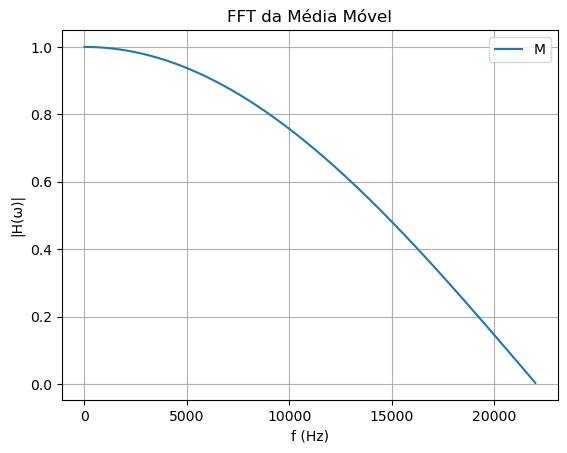

In [22]:
# Plota FFT
def fft(signal, N, fs=1):
    T  = 1/fs
    y  = signal
    yf = (2.0/N) * abs(ft.fft(y)[0:N//2])
    xf = ft.fftfreq(N, T)[:N//2]
    DSP.plot([yf, xf])
    return
#
# y[k] = (x[k]+x[k+1] + ... + x[k+n-1])/n
# a    = [n]
# b    = [1, 1, ..., n], len(b) = n
#
n = 2
a = [n]
b = np.ones(n)
[w, H] = sp.freqz(b, a, fs=44100)
H      = np.abs(H)
DSP.Plot_Fourier([H, w], title="FFT da Média Móvel")

In [23]:
i  = np.where(np.abs(H - 1/np.sqrt(2))<1e-6)[0][0]
fc = w[i]
print("Frequência de Corte:", round(fc/1e3, 3), "kHz")

Frequência de Corte: 11.025 kHz


A média móvel é um filtro tipo passa-baixa

## Frequência de corte da média móvel

Resposta ao impulso:

$h[n] = \dfrac{1}{N}\sum^{N-1}_{k=0}{\delta[n-k]}$, onde $N$ é o número de amostras da média ($N$=2 nesse caso)

$h[n] = \dfrac{1}{2}\sum^{1}_{k=0}{\delta[n-k]} = \dfrac{1}{2}(\delta[n]+\delta[n-1])$

Fazendo a transformada z:

$H(z) = \dfrac{1+z^{-1}}{2} \rightarrow a=[N], b=ones(N)$

Como para a resposta em frequência $z=e^{j\omega}$

$|H(j\omega)| = |\dfrac{1+e^{-j\omega}}{2}| = \dfrac{1}{\sqrt{2}}$

Resolvendo para $1+e^{-j\omega}$:

$|1+e^{-j\omega}| = \sqrt{2}$

Resolvendo $|1+e^{-j\omega}|$:

$|1+e^{-j\omega}|=|\sqrt{(1+cos(\omega))^2+(sin(\omega))^2}=\sqrt{1+2cos(\omega)+(cos^2(\omega)+sin^2(\omega))}$

$|1+e^{-j\omega}| = \sqrt{2+2cos(\omega)}=\sqrt{2}\cdot\sqrt{1+cos(\omega)}$

$\cancel{\sqrt{2}}\cdot\sqrt{1+cos(\omega)}=\cancel{\sqrt{2}}$

$1+cos(\omega)=1 \rightarrow \cos(\omega=0) \rightarrow \omega \approx 1.571\space (90º)$ rad/sample

$f_c = \dfrac{\omega}{2\pi} \approx 0.25$ (1/4) cycle/sample

Convertendo de frequência digital para frequência real:

Como $f_s=44.1\space kHz$, $f_c = 44.1k\cdot 0.25 = 11.025\space kHz$ (1/4)

Ganho do sinal: []


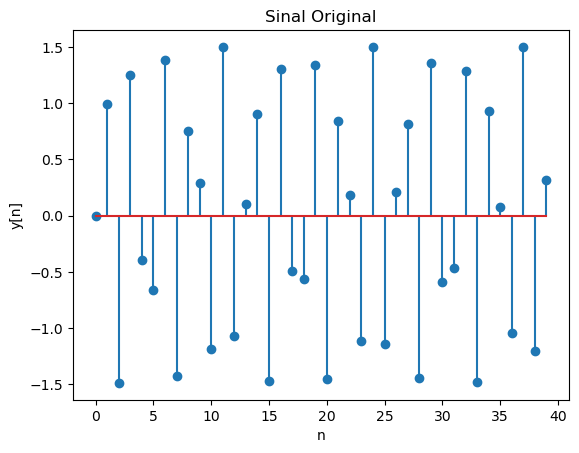

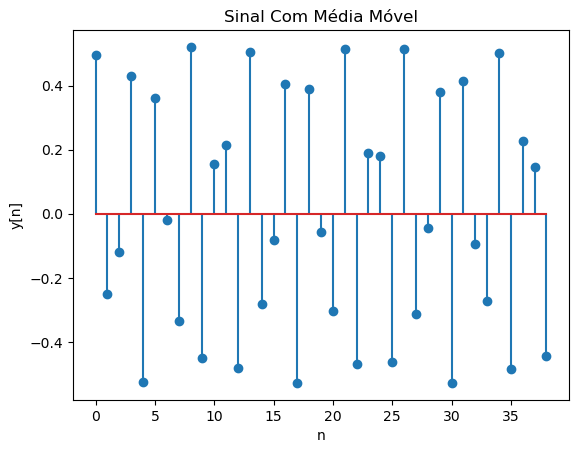

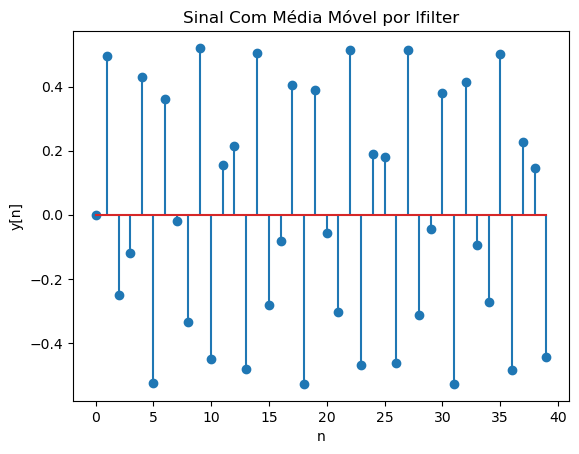

In [24]:
fs = 44.1e3
f  = 17e3
####
i  = np.where(np.abs(w/(2*np.pi) - f)<1e-6)
h  = np.abs(H[i])
print("Ganho do sinal:", h)
####
w  = 2*np.pi* f/fs
n  = np.arange(0, 40)
na = 2                       # n amostras
####
x   = 1.5*np.sin(w*n)
DSP.plot([x, n], title="Sinal Original")
xf  = media_movel(x, na)
DSP.plot([xf, n[:-(na-1)]], title="Sinal Com Média Móvel")
xlf = sp.lfilter(b, a, x)
DSP.plot([xlf, n], title="Sinal Com Média Móvel por lfilter")

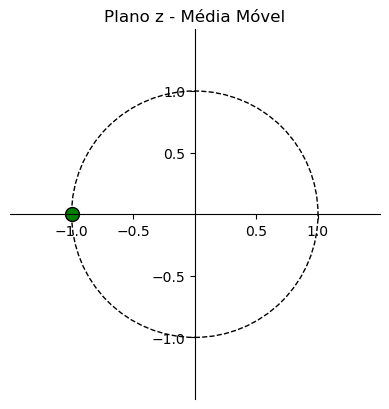

(array([-1.]), array([], dtype=float64))

In [25]:
DSP.zplane(b, a, title="Plano z - Média Móvel")

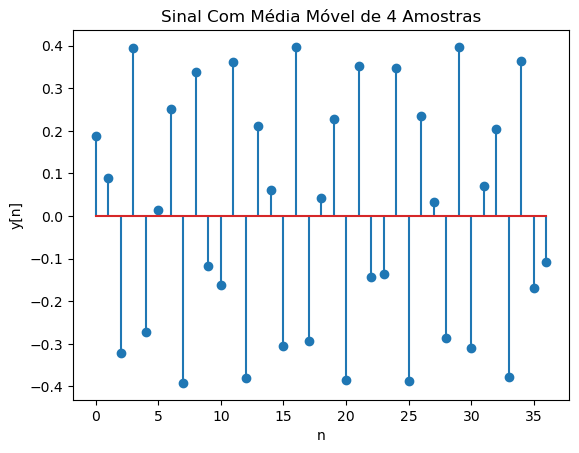

In [26]:
# Implementação com 4 amostras
na = 4
xf = media_movel(x, na)
DSP.plot([xf, n[:-(na-1)]], title="Sinal Com Média Móvel de 4 Amostras")

Podemos ver que a amplitudo do sinal foi levemente reduzida e que o sinal está em uma frequência mais baixa, portanto há suavização do sinal

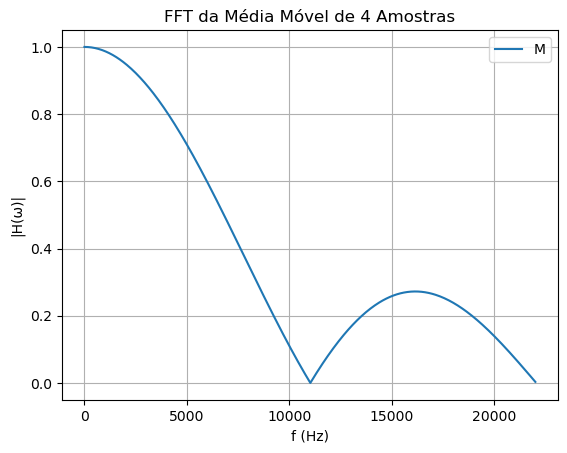

In [27]:
a = [na]
b = np.ones(na)
[w, H] = sp.freqz(b, a, fs=44100)
H      = np.abs(H)
DSP.Plot_Fourier([H, w], title="FFT da Média Móvel de 4 Amostras")

A principal diferença é que a panda passante é muito menor, chegando até a ter uma inversão de fase próximo a f~11 kHz

In [28]:
[fs, sweep] = DSP.read_wav('Sinais/Sweep.wav')

sweep_4 = media_movel(sweep[:, 0], 4)

sweep_4 = sweep_4/np.max(sweep_4)

DSP.write_wav('Sinais/Averaged_Sweep.wav', fs, sweep_4)

## Análise do Sinal Sweep com Média Móvel

Sinal Completo:
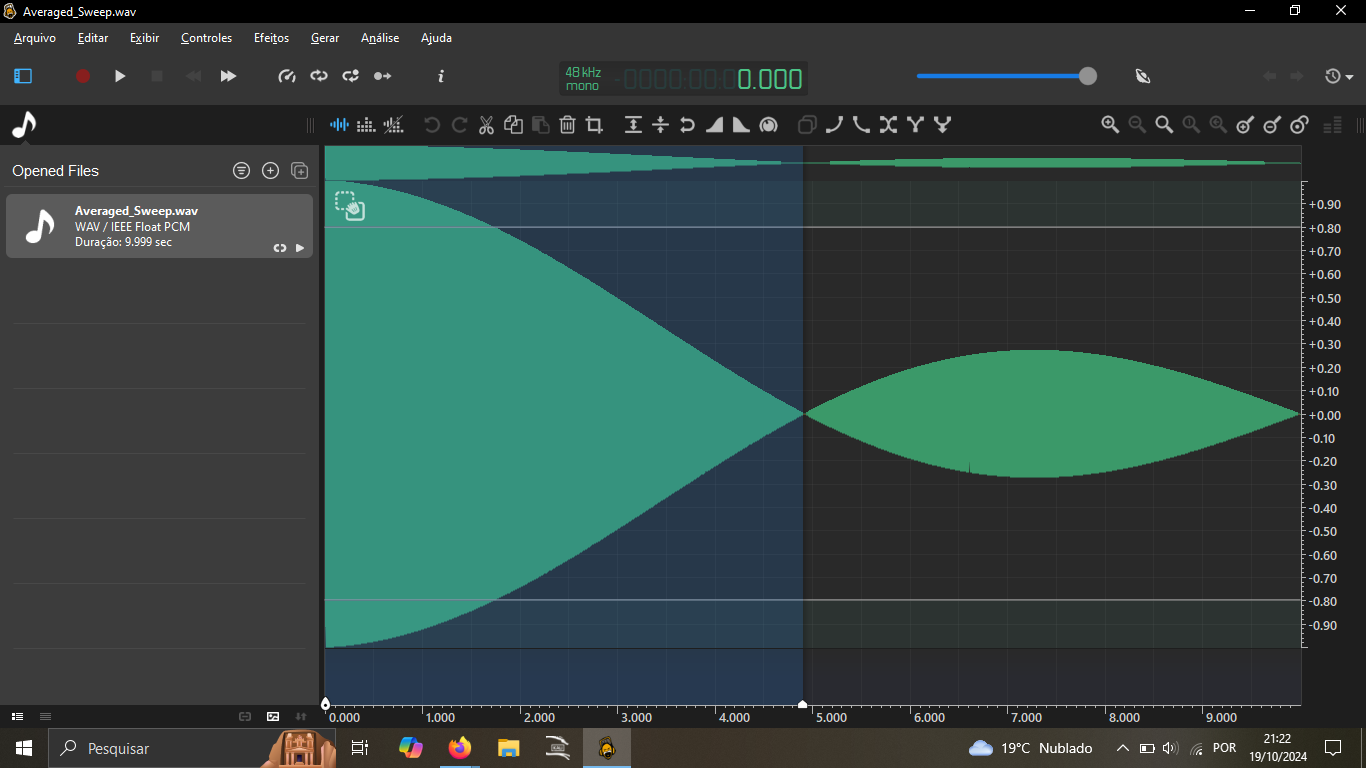
Podemos ver que o sinal está divido em dois "lobos", olhando para a FFT feita para a questão G, podemos assumir que esta é a parte do sinal que consiste de frequências menores que a frequência crítica - onde a fase é invertida. Podemos então fazer uma análise FFT do sinal em cada um dos lobos, nos dando os seguintes resultados:

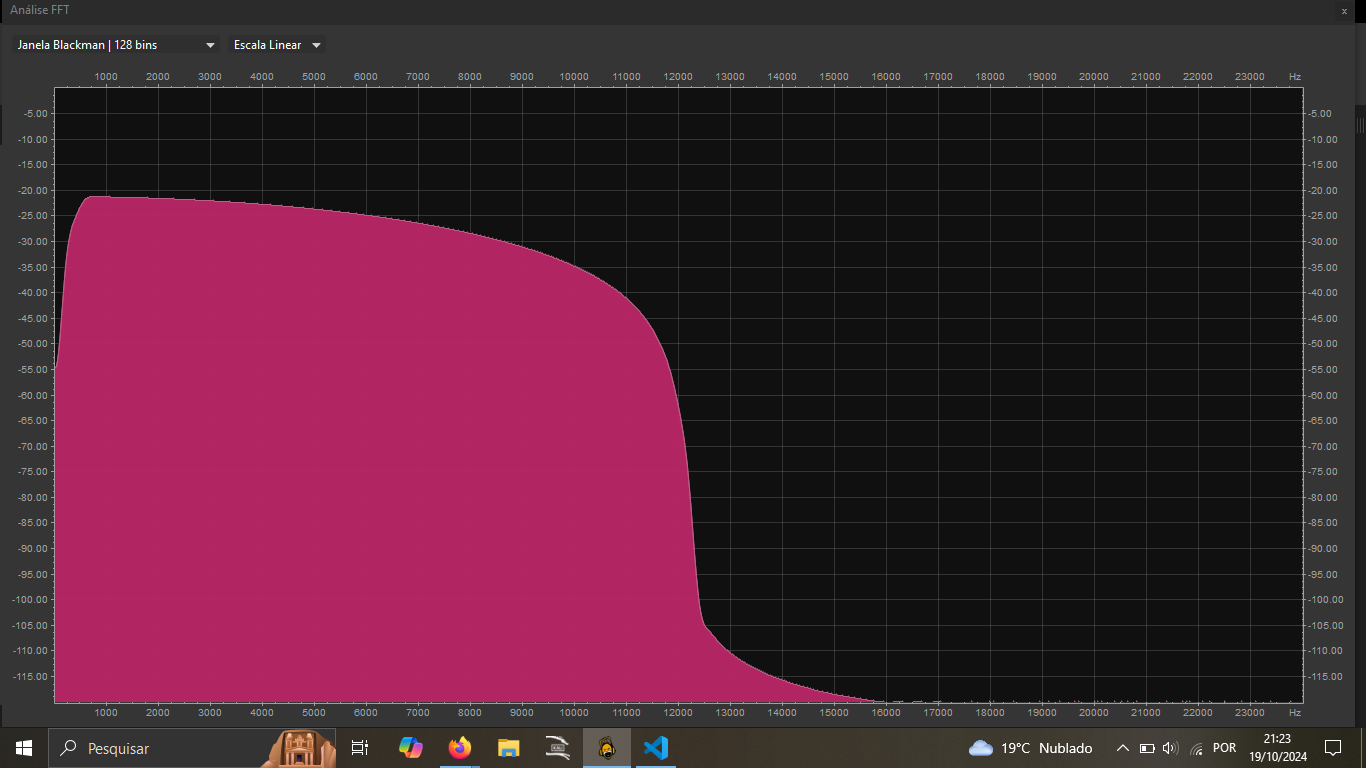
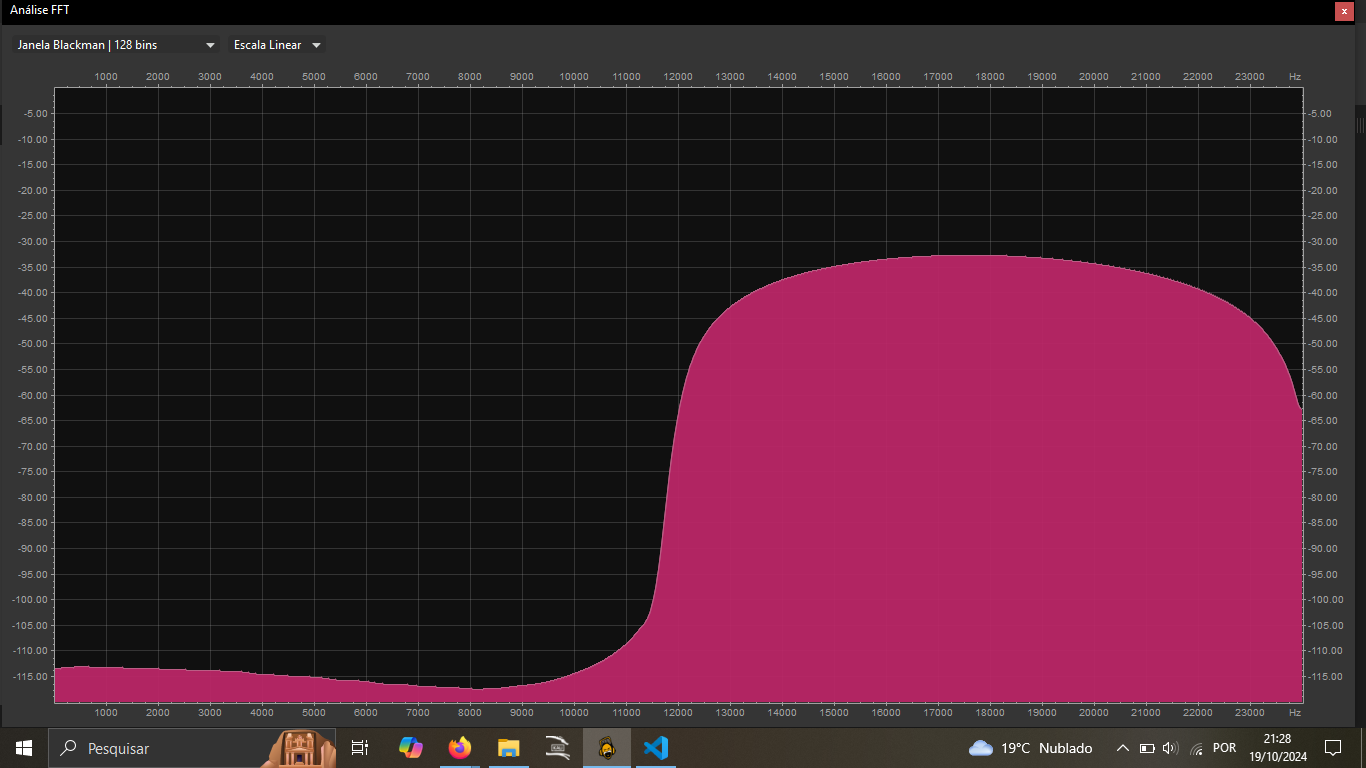

Podemos ver o mesmo comportamento que na análise FFT do filtro média móvel, portanto o resultado comforma com o esperado.